In [ ]:
# 📘 LDA for Dimensionality Reduction and Classification (Iris Dataset)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1) Load labelled dataset
iris = load_iris()
X, y, names = iris.data, iris.target, iris.target_names

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3) Baseline classifier on original features (for reference)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

base_clf = LogisticRegression(max_iter=1000)
base_clf.fit(X_train_std, y_train)
base_acc = accuracy_score(y_test, base_clf.predict(X_test_std))

# 4) LDA: reduce to 2 components (since Iris has 3 classes → max 2 LDA components)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)   # fit on train only
X_test_lda  = lda.transform(X_test)

# 5) Simple classifier on LDA components
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_lda, y_train)
y_pred = clf.predict(X_test_lda)
lda_acc = accuracy_score(y_test, y_pred)




In [3]:
print(f"✅ Baseline (LogReg on original features) accuracy: {base_acc:.3f}")
print(f"✅ LDA + LogReg accuracy: {lda_acc:.3f}")



✅ Baseline (LogReg on original features) accuracy: 0.911
✅ LDA + LogReg accuracy: 0.978


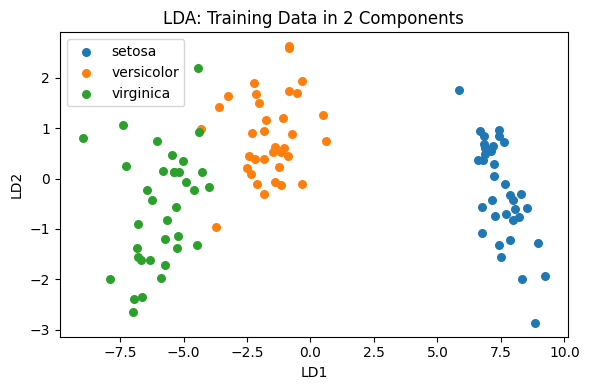

In [4]:
# 6) Visualize LDA-transformed data (2D)
plt.figure(figsize=(6,4))
for cls, label in enumerate(names):
    plt.scatter(X_train_lda[y_train==cls, 0], X_train_lda[y_train==cls, 1], label=label, s=30)
plt.title("LDA: Training Data in 2 Components")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.tight_layout()
plt.show()

📊 Retail Dataset Preview:
   Revenue  Profit  Discount  Cost Category
0     2000     400        10  1600  Regular
1     3500     900        15  2600  Premium
2     1800     200         5  1600  Regular
3     4000    1200        20  2800  Premium
4     2500     500        10  2000  Regular

✅ Model Accuracy after LDA: 80.00%


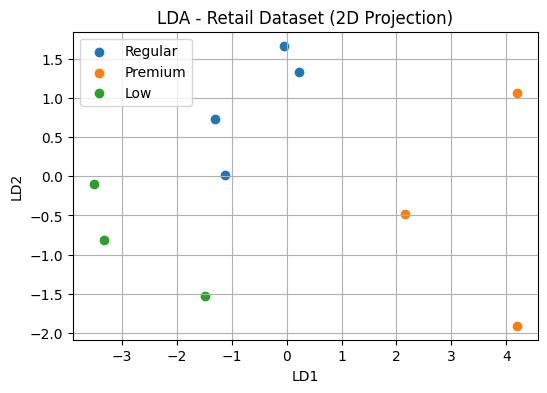

In [5]:
# 📘 Linear Discriminant Analysis (LDA) on Retail Dataset

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load your retail dataset
# Make sure your CSV has a target/class column like 'Category'
data = pd.read_csv("retail.csv")  # 👈 Replace with your actual file name
print("📊 Retail Dataset Preview:")
print(data.head())

# Step 3: Separate features (X) and labels (y)
X = data.drop('Category', axis=1)
y = data['Category']

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply LDA (reduce to 2 components for visualization)
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Step 7: Train a simple classifier on LDA data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_lda, y_train)
y_pred = model.predict(X_test_lda)

# Step 8: Evaluate model accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy after LDA: {acc*100:.2f}%")

# Step 9: Visualize LDA-transformed data
plt.figure(figsize=(6,4))
for label in y.unique():
    plt.scatter(X_train_lda[y_train == label, 0],
                X_train_lda[y_train == label, 1],
                label=str(label))
plt.title("LDA - Retail Dataset (2D Projection)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()
